# Linear regression

- Daily interview Q&A for 5/6/20, lead by Ben Lacar
- This problem covers: standard error, t-statistic, linear regression, f-statistic, ANOVA, using statsmodels
- This is good to know for analyst and machine learning roles

[Relevant chapter from ISLR](https://link.springer.com/chapter/10.1007/978-1-4614-7138-7_3#enumeration)
<br>
[Writing math symbols in markdown](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html)
<br>
[quick reference](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference)

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import advertisements dataset

In [37]:
df_ad = pd.read_csv("ISLR_data/Advertising.csv", index_col=0)
df_ad.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


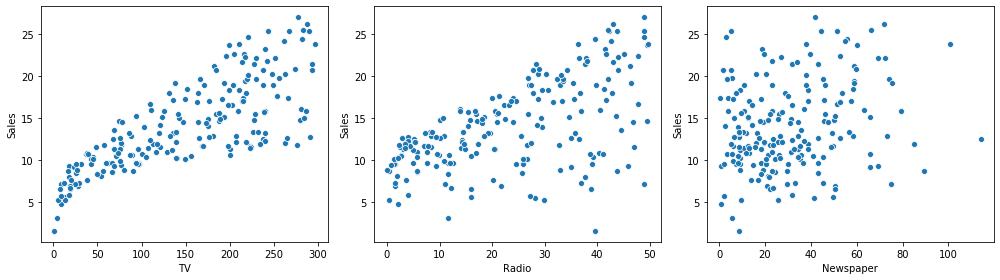

In [38]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
sns.scatterplot(x='TV', y='Sales', data=df_ad, ax=ax1)
sns.scatterplot(x='Radio', y='Sales', data=df_ad, ax=ax2);
sns.scatterplot(x='Newspaper', y='Sales', data=df_ad, ax=ax3)
plt.tight_layout();

# Simple linear regression

Focus on: t-statistic, standard errors of coefficient, using scikit-learn and statsmodels

## Get linear regression coefficients for TV dataset using scikit-learn

- Hint: What parameter do you need to set to get the intercept for the term?
- [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
X = df_ad['TV']
y = df_ad['Sales']

In [34]:
X1 = np.array(X).reshape(-1, 1)  # accomodate sklearn

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X1, y)

df_skl_coef = pd.DataFrame()
df_skl_coef["coefficients"] = [lin_reg.intercept_] + lin_reg.coef_.tolist()  # np.concatenate((lin_reg.intercept_, lin_reg.coef_.flatten()), axis=0)    # took a while to figure out how to format
df_skl_coef.index = ["constant", X.name]
df_skl_coef

,coefficients
constant,7.032594
TV,0.047537


## Get linear regression coefficients with statsmodels

- Hint: Don't forget to add a vector of 1s using sm.add_constant(X.values)
- [statsmodels documentation](https://www.statsmodels.org/stable/regression.html)
- [explanation of setting target and feature](https://www.statsmodels.org/stable/endog_exog.html)


In [407]:
import statsmodels.api as sm

In [408]:
# endog=target, exog=features
X = df_ad["TV"]
y = df_ad["Sales"]


# Vector of 1s is needed

### Questions

- What is the t-statistic for the beta1 coefficient telling us?
- What are the null and alternative hypotheses?


## Manually calculate standard errors of the coefficients with statsmodels output

For calculations below that need coefficient values, pull them from the statsmodels or scikit learn output.

Formulas for standard errors for each coefficient.

$SE(\hat{\beta_0})^2 = \sigma^2[\frac{1}{n} + \frac{\bar{x}^2}{\Sigma(x_i-\bar{x})^2}]$

$SE(\hat{\beta_1})^2 = \frac{{\sigma}^2}{\Sigma(x_i-\bar{x})^2}$

But note that we will substitute **residual standard error** in place of $\sigma$.

$ RSE = \sqrt{RSS/(n-2)}$


**Residual sum of squares**

$ RSS = (y_1 - \hat{\beta_0} - \hat{\beta_1}x_1)^2 + (y_2 - \hat{\beta_0} - \hat{\beta_1}x_2)^2 + ... (y_n - \hat{\beta_0} - \hat{\beta_1}x_n)^2  $


TSS is the *total sum of squares*
<br>
TSS = $\Sigma(y_i - \bar{y_i})^2$                <------ squared distance of the data point **from the average**

RSS is the *residual sum of squares*
<br>
RSS = $\Sigma(y_i - \hat{y_i})^2$                 <------ squared distance of data point **from the model prediction**


In [411]:
def get_sum_dist_squared_v1(arr):
    """
    This can be used for the denominator of the above formulas.
    """
    import numpy
    arr_mean = np.mean(arr)     
    
    sum_dist_squared = 0
    for i in arr:
        sum_dist_squared += (i-arr_mean)**2
    
    return sum_dist_squared

In [6]:
def get_rss_v1(beta0, beta1, X_vals, y_vals):
    """
    Write a function to calculate rss
    """
   
    return rss

In [7]:
my_beta0 = 7.0326
my_beta1 = 0.0475

# my_rss = get_rss_v1(my_beta0, my_beta1, df_ad['TV'].tolist(), df_ad['Sales'].tolist())
# print(my_rss)

In [8]:
# rse = np.sqrt(my_rss/(n-2))
# print(rse)

In [9]:
# x_bar = df_ad['TV'].mean()
# beta0_se = ?
# beta1_se = ?

# print('Manually calculated beta0 SE {0:0.3f} and beta 1 SE {1:0.3f}'.format(beta0_se, beta1_se))

**Calculate the t-statistic for the beta1 coefficient.**

In [310]:
def calculate_t_statistic(coefficient, se):

    return tstat

In [10]:
my_tstat = calculate_t_statistic(0.0475, beta1_se)
print('Manually calculated t-statistic: {0:0.3f}'.format(my_tstat))

NameError: name 'calculate_t_statistic' is not defined

**Calculate the f-statistic for this model and data.**

$ F = \frac{(TSS - RSS)/p}{(RSS)/(n-p-1)} $

p = number of features
n = number of samples

**Fill in function for TSS**

In [11]:
def get_tss(y_vals):
    """
    Calculate tss
    """
    

    return tss

In [13]:
# my_tss = get_tss(df_ad['Sales'].tolist())
# print(my_tss)

In [422]:
def calculate_f_statistic(tss, rss, n_features, n_samples):
    """
    Fill in function for f-statistic
    """

    return f_statistic

In [423]:
my_fstat = calculate_f_statistic(my_tss, my_rss, 1, df_ad.shape[0])

print('Manually calculated f-statistic: {0:0.2f}'.format(my_fstat))

Manually calculated f-statistic: 312.14


**How are the t-statistic and f-statistic related? What linear transformation can you do for one to get the other?**

$ R^2 = \frac{(TSS - RSS)}{TSS} $

In [424]:
def get_r_squared(tss, rss):
    num = (tss-rss)
    den = tss
    r2 = num/den
    return r2

In [308]:
get_r_squared(my_tss, my_rss)

0.6118736182133632

# Multiple linear regression

This approach helps extend analysis to accomdate additional predictors. Each predictor (variable) is given a separate slope coefficient in a single model. **We interpret each coefficient $\beta_j$ as the average effect on the target $Y$ of a one unit increase in its associated feature $X_j$, holding all other features constant.** 

$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p + \epsilon$

## Use statsmodels to get the coefficients and statistics for the model using all three features (TV, Radio, Newspaper)



In [44]:
import statsmodels.api as sm

In [57]:
# endog=target, exog=features
X = df_ad[["TV", "Radio", "Newspaper"]]
y = df_ad["Sales"]

X1 = sm.add_constant(X.values)  # Vector of 1s is needed

In [58]:
mod = sm.OLS(endog=y, exog=X1)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 07 May 2020   Prob (F-statistic):           1.58e-96
Time:                        15:36:47   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
x1             0.0458      0.001     32.809      0.000       0.043       0.049
x2             0.1885      0.009     21.893      0.000       0.172       0.206
x3            -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
res.params

const    2.938889
x1       0.045765
x2       0.188530
x3      -0.001037
dtype: float64

### Questions

- What features are significant?
- What does the f-statistic tell us? What are the null and alternate hypotheses?

### Update RSS function to allow for multivariate model

In [95]:
def get_rss_v2(betas, X_vals, y_vals):
    """
    Iterative solution             
    # Exercise 2: Create multivariate linear regression model
    # Hint: It is a lot easier with matrix multiplication
    """
    
    # Update below
    beta_X_matrix = betas*X_vals
    res_vector = y_vals-np.sum(beta_X_matrix, axis=1)
    rss = np.sum(res_vector**2)

    return rss

### Manually calculate the f-statistic and confirm that it matches the statsmodels output

$ F = \frac{(TSS - RSS)/p}{(RSS)/(n-p-1)} $

In [97]:
my_betas = res.params.tolist()
my_X_vals = X1
my_y_vals = df_ad['Sales'].tolist()
my_rss_mv = get_rss_v2(my_betas, my_X_vals, my_y_vals)
print(my_rss_mv)

556.8252629021873


In [98]:
my_fstat_mv = calculate_f_statistic(my_tss, my_rss_mv, 3, df_ad.shape[0])
print('Manually calculated f-statistic: {0:0.2f}'.format(my_fstat_mv))

NameError: name 'calculate_f_statistic' is not defined

## Another look at the t-statistic and f-statistic

Sometimes we want to test that a particular subset of q of the coefficients are zero. **Generate another model where you leave off newspaper.**


In [20]:
# endog=target, exog=features
X = df_ad[["TV", "Radio"]]
y = df_ad["Sales"]
X1 = sm.add_constant(X.values)  # Vector of 1s is needed

NameError: name 'sm' is not defined

In [21]:
mod = sm.OLS(endog=y, exog=X1)
res = mod.fit()
res.summary()

NameError: name 'sm' is not defined

**New F-statistic formula, leaving off newspaper**

$ F = \frac{(RSS_0 - RSS)/q}{(RSS-n-p-1)} $

q = 1 (one feature left out)

**What is this new F value?**

In [22]:
# my_betas_noNews = [xxx]
my_rss_mv_noNews = get_rss_v2(my_betas_noNews, my_X_vals[:, 0:3], my_y_vals)
my_rss_mv_noNews

NameError: name 'my_betas_noNews' is not defined

In [23]:
((my_rss_mv_noNews-my_rss_mv)/1)/(my_rss_mv/(n-3-1))

NameError: name 'my_rss_mv_noNews' is not defined

**Look back at the full model's t-statistic for newspaper and square it.**

In [26]:
# (xxx)**2

**Formula for the t-statistic**

Formula that we have seen for counts data:

$T = \frac{\bar{X} - \mu}{se(\bar{X})} = \frac{\bar{X} - \mu}{S_X/\sqrt{n})}$

In the context of linear regression:

$t = \frac{\bar{\beta_1} - 0}{se(\bar{\beta_1})}$ 

**The t-statistic is reporting how many standard errors the coefficient (slope) is from 0**

**Deciding on important variables**

We know that we can look at the F-statistic to see if there is at least *one* feature that significantly related to the response. We can look at p-values of each feature but if the number of features is large, we can make some false discoveries. We could apply a process of *variable* or *feature selection*. We can try different combinations of features but practically that would be time consuming. Instead, we can apply classical approaches for this task:

- *Forward selection*. Start with a null model, one that contains an intercept but no predictors. Then fit *m* simple linear regressions (m=number of features) and add to the null model the variable that results in the lowest RSS. Add a second variable that results in the lowest RSS for the next two-variable model. Keep doing this until some stopping rule is satisifed.
- *Backward selection*. Instead start with all variables in the model, then remove the variable with the largest p-value (least significant). Keep doing this until some stopping rule is reached (e.g. when the remaining variables have a p-value below some threshold.
- *Mixed selection*. A combination of forward and backward selection. Start with no variables in the model, then add variable that best fits like in forward selection. Keep adding until a variable added rises above a p-value threshold, then remove it. Continue performing forward and backward steps until all variables have a sufficiently low p-value and all variables outside the model would have a large p-value if added to the model. (*Not entirely sure I understand this.*)

Note: Backward selection cannot be used if m > n, while forward selection can always be used. Forward selection is a greedy approach, and might include variables early that later become redundant. Mixed selection can remedy this.

More detail about this is discussed in Chapter 6.